In [ ]:
OLLAMA_BASE_URL = "http://ollama:11434/v1"
MODEL = "llama3.2"

In [7]:
from pydantic_ai.models.openai import OpenAIChatModel
from pydantic_ai.providers.ollama import OllamaProvider


ollama_model = OpenAIChatModel(
    model_name=MODEL,
    provider=OllamaProvider(base_url=OLLAMA_BASE_URL),
)

## Few-shot examples


Few-shot prompting is a technique where you provide a few examples of the task you want the model to perform within the prompt itself. This helps the model understand the context and the desired output format, leading to more accurate and consistent results. It's particularly useful for tasks that require a specific structure or when you want to guide the model's behavior without fine-tuning it.


In [ ]:
from typing import Literal
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class SentimentAnalysis(BaseModel):
    sentiment: Literal["Positive", "Negative", "Neutral"] = Field(
        description="The sentiment of the text."
    )


few_shot_system_prompt = """
You are a sentiment analysis expert specializing in software user feedback.

### Examples:
User text: "I love how the app freezes every time I try to export. Really keeps me on my toes!"
Response: {"sentiment": "Negative"}
User text: "There's a charming little bug where my profile picture rotates 360 degrees when clicked. Hilarious, but not sure it's intentional."
Response: {"sentiment": "Negative"}
User text: "Is there really no way to undo changes? Am I missing something obvious here?"
Response: {"sentiment": "Negative"}
User text: "Adding keyboard shortcuts would be a game-changer for power users like me!"
Response: {"sentiment": "Positive"}
User text: "My only issue is that this tool works so well, I can't justify using anything else. Great work!"
Response: {"sentiment": "Positive"}
User text: "The API should support pagination for large result sets."
Response: {"sentiment": "Neutral"}
"""

agent = Agent(
    ollama_model,
    output_type=SentimentAnalysis,
    system_prompt=few_shot_system_prompt,
    retries=9,
)

result = await agent.run(
    """Am I missing something, or is there really no way to batch-edit records?"""
)
print(result.output)

sentiment='Negative'


In [67]:
from typing import Literal
from pydantic import BaseModel, Field
from pydantic_ai import Agent


class SentimentAnalysis(BaseModel):
    sentiment: Literal["Positive", "Negative", "Neutral"] = Field(
        description="The sentiment of the text."
    )


few_shot_system_prompt = """
You are a sentiment analysis expert specializing in software user feedback.
"""

agent = Agent(
    ollama_model,
    output_type=SentimentAnalysis,
    system_prompt=few_shot_system_prompt,
    retries=9,
)

result = await agent.run(
    """Am I missing something, or is there really no way to batch-edit records?"""
)
print(result.output)

sentiment='Neutral'


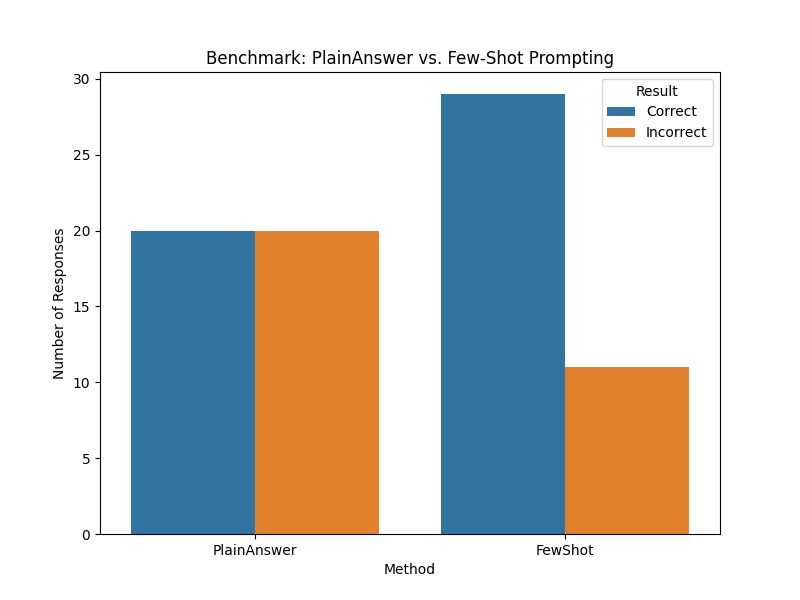